<a href="https://colab.research.google.com/github/HamedTabkhi/Intro-to-ML/blob/main/K_means_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

#We will start by loading the digits and then finding the KMeans clusters.
#The digits consist of 1,797 samples with 64 features
#64 features is the brightness of one pixel in an 8×8 image:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
#Here we will attempt to use k-means to try to identify similar digits without using the original label information;
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

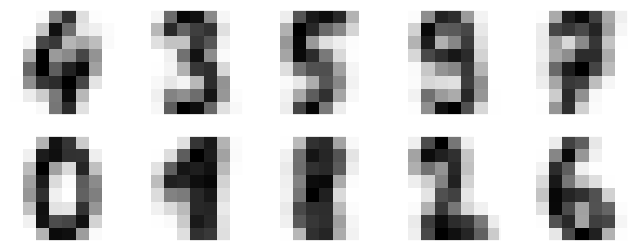

In [13]:
#The result is 10 clusters in 64 dimensions.
#Notice that the cluster centers themselves are 64-dimensional points
#Let's plot the center points per each cluster
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
#Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
#We can match each learned cluster label with the true labels found in them:
from scipy.stats import mode

labels = np.zeros_like(clusters)
#The np. zeros_like() function is used in Python that returns an array of zeros with the same shape and type as a given array.
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:
#Now we can check how accurate our unsupervised clustering was in finding similar digits within the data
from sklearn.metrics import accuracy_score
#Returns the mean accuracy on the given test data and labels.
#Here we consider the entire training as a test
accuracy_score(digits.target, labels)

0.7935447968836951

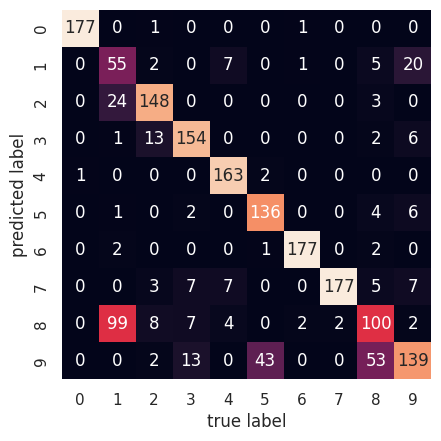

In [16]:
#Let's check the confusion matrix for this:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
clusters = kmeans.fit_predict(digits_proj)
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

NameError: ignored

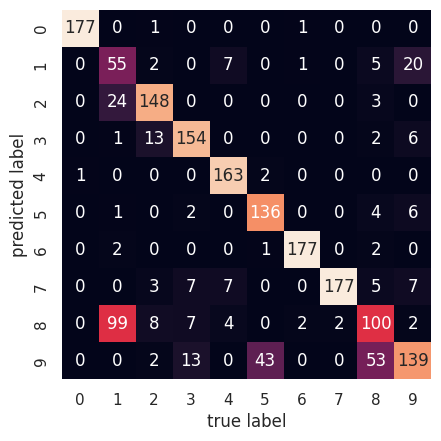

In [10]:

#Let's check the confusion matrix for this:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');